In [64]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [65]:
# Comment out appropriate portion
#tk = th.Thicket.from_caliperreader(glob("cali_files/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/Random/Strong_Scaling_MPI/*.cali"))
tk = th.Thicket.from_caliperreader(glob("MPI-WeakScaling/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/16777216_Strong/*.cali"))


In [66]:
# Performance data
tk.dataframe
tk.dataframe = tk.dataframe.drop([('Min time/rank'),('Max time/rank'),('Total time'), ('Variance time/rank'), ('nid')], axis=1)

In [67]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
48308794,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a16384.cali,true,1702019673,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 16384]",c,SampleSort,MPI,float,4,16384,1%perturbed,16,24,Mix of Handwritted and AI and Online
388927773,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a32768.cali,true,1701909870,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 32768]",c,SampleSort,MPI,float,4,32768,Random,32,24,Mix of Handwritted and AI and Online
596658815,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a16384.cali,true,1702020171,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 16384]",c,SampleSort,MPI,float,4,16384,Sorted,16,24,Mix of Handwritted and AI and Online
846419741,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a16384.cali,true,1702020732,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 16384]",c,SampleSort,MPI,float,4,16384,Reversesorted,16,24,Mix of Handwritted and AI and Online
886397954,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a4096.cali,true,1702020712,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 4096]",c,SampleSort,MPI,float,4,4096,Reversesorted,4,24,Mix of Handwritted and AI and Online
899409077,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1024.cali,true,1702020872,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 1024]",c,SampleSort,MPI,float,4,1024,Reversesorted,2,24,Mix of Handwritted and AI and Online
920769742,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a32768.cali,true,1702020252,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 32768]",c,SampleSort,MPI,float,4,32768,Sorted,32,24,Mix of Handwritted and AI and Online
1070987552,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a32768.cali,true,1702020992,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 32768]",c,SampleSort,MPI,float,4,32768,Reversesorted,32,24,Mix of Handwritted and AI and Online
1493257032,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a8192.cali,true,1702020972,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sort, 8192]",c,SampleSort,MPI,float,4,8192,Reversesorted,8,24,Mix of Handwritted and AI and Online


In [68]:
tk.metadata
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comp_large
├─ 1.000 comp_small
├─ 1.000 data_init
├─ 1.000 gatherv
├─ 1.000 scatter
└─ 1.000 scatterv

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [69]:
# strong
# gb = tk.groupby([("InputSize"), ("InputType")])
# weak
gb = tk.groupby([("InputType")])

4  thickets created...
{('1%perturbed',): <thicket.thicket.Thicket object at 0x179ce1490>, ('Random',): <thicket.thicket.Thicket object at 0x179d2b0d0>, ('Reversesorted',): <thicket.thicket.Thicket object at 0x179d43c10>, ('Sorted',): <thicket.thicket.Thicket object at 0x179d7c250>}


In [70]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [71]:
ctk.dataframe

(1%perturbed,)  \
                                                       spot.channel   
node                                       num_procs                  
{'name': 'main', 'type': 'function'}       2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'comp_large', 'type': 'function'} 2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'comp_small', 'type': 'function'} 2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'data_init', 'type': 'function'}  2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'gatherv', 'type': 'function'}    2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'scatter', 'type': 'function'}    2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   
{'name': 'scatterv', 'type': 'function'}   2          regionprofile   
                                           4          regionprofile   
                                           8          regionprofile   
                                           16         regionprofile   
                                           32         regionprofile   
                                           64         regionprofile   

                                                                    \
                                                     Avg time/rank   
node                                       num_procs                 
{'name': 'main', 'type': 'function'}       2              0.605959   
                                           4              0.608312   
                                           8              0.496445   
                                           16             0.753179   
                                           32             1.575702   
                                           64             2.561979   
{'name': 'comp_large', 'type': 'function'} 2              0.000027   
                                           4              0.000133   
                                           8              0.000398   
                 

In [72]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)

# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])



In [73]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())
#time = set(ctk.dataframe.index.get_level_values("Total time"))

In [74]:
ctk.dataframe.loc["main"]

(1%perturbed,)                    (Random,)                \
            spot.channel Avg time/rank   spot.channel Avg time/rank   
num_procs                                                             
2          regionprofile      0.605959  regionprofile      0.278643   
4          regionprofile      0.608312  regionprofile      0.369091   
8          regionprofile      0.496445  regionprofile      0.489378   
16         regionprofile      0.753179  regionprofile      0.761832   
32         regionprofile      1.575702  regionprofile      1.372553   
64         regionprofile      2.561979  regionprofile      2.643338   

          (Reversesorted,)                    (Sorted,)                
              spot.channel Avg time/rank   spot.channel Avg time/rank  
num_procs                                                              
2            regionprofile      0.704891  regionprofile      0.692631  
4            regionprofile      0.455876  regionprofile      0.598624  
8            regionprofile      0.476873  regionprofile      0.481259  
16           regionprofile      0.771543  regionprofile      0.766002  
32           regionprofile      1.429873  regionprofile      1.383973  
64           regionprofile      2.616648  regionprofile      2.690821

In [75]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

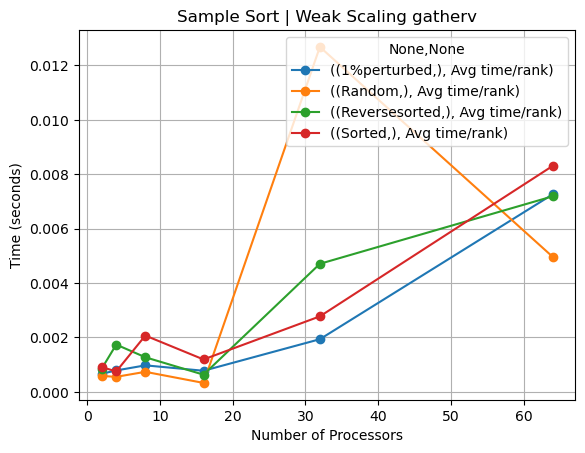

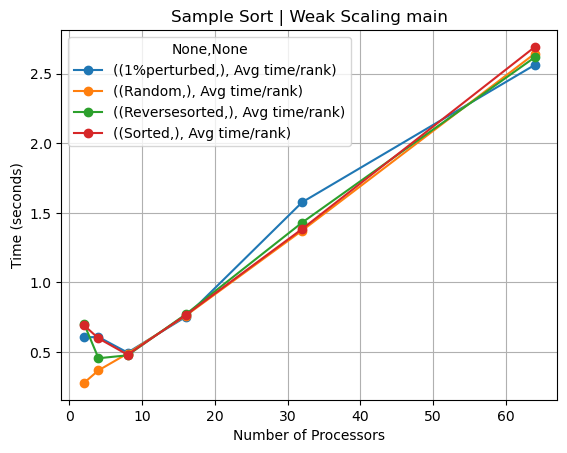

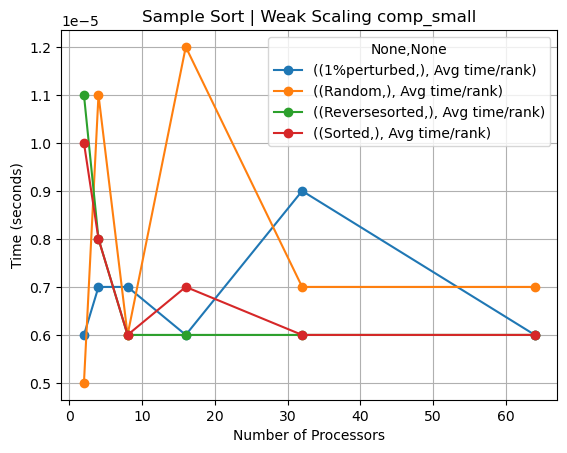

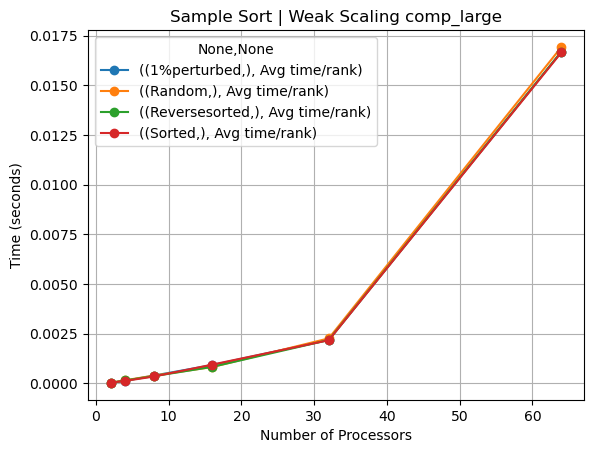

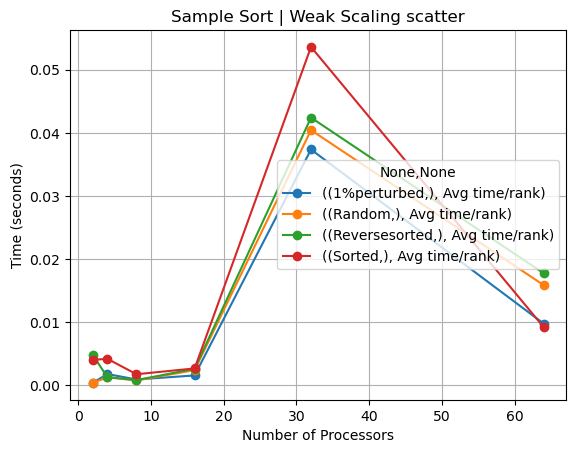

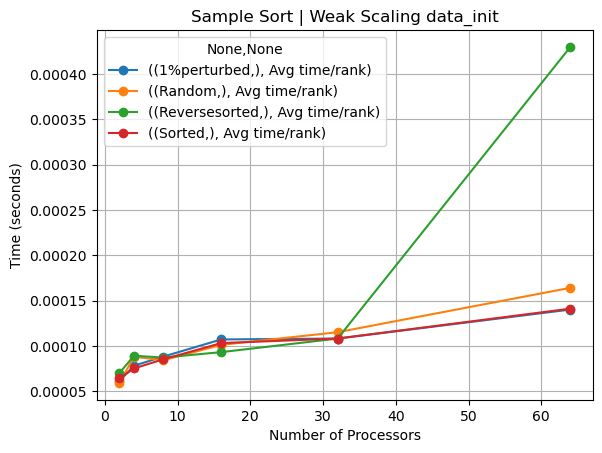

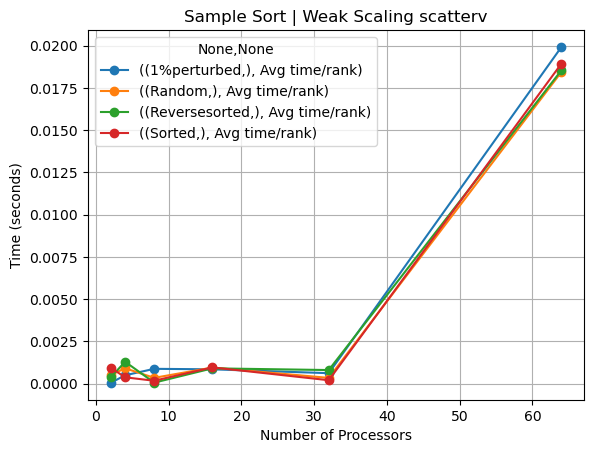

In [78]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title="Sample Sort | Weak Scaling " + name,
        xlabel="Number of Processors",
        ylabel="Time (seconds)",
        # set to False 
        loglog=False
    )

In [50]:
# how to get input_sizes?
# speed up
input_sizes = set(tk.metadata["InputSize"])
for name in function_names:
    for size in input_sizes:
        temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc[name]
        temp_df = temp_df.iloc[0]/temp_df

        plot_pandas (
            title = "Speed Up | " + name,
            xlabel = "Threads",
            ylabel = "Time (seconds)",
            # True or False? 
            loglog=False,
            df = temp_df
        )

TypeError: no numeric data to plot

In [22]:
temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 1000 and col[1] == "Avg time/rank"]].loc[name]
temp_df.iloc[0]/temp_df

num_procs
2
4
8
16
32
64
